# Prediction Delivery Time

# EDA Dataset

## Explore

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns   


In [2]:
df_ebay = pd.read_csv('../data/raw/ebayShort.csv', nrows=100000 ,index_col=0)

As the data is too big, we first working in the shortcut of the total data with 1 million rows.

In [3]:
# Look at the first 5 row

df_ebay.head()

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5


In [4]:
#Look at 5 random row
df_ebay.sample(5)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
9634,B2C,19202,5.0,2019-03-07 22:38:00.000-05:00,7,0.00,2,5,27006,36207,3,18.03,1,2019-03-02 23:23:43.000-05:00,2019-03-09,48,1,PACKAGE_THICK_ENVELOPE,9635
91094,B2C,146846,3.0,2018-10-12 21:35:00.000-04:00,0,0.00,3,5,02053,26681,1,30.00,2,2018-10-11 14:30:32.000-04:00,2018-10-15,8,1,PACKAGE_THICK_ENVELOPE,91095
10774,C2C,354803,1.0,2019-07-22 14:44:00.000-05:00,2,7.55,2,9,50220,03446,13,20.00,1,2019-07-20 13:35:18.000-05:00,2019-07-24,0,1,PACKAGE_THICK_ENVELOPE,10775
64306,C2C,168334,3.0,2018-07-06 12:56:00.000-04:00,0,3.75,3,5,26508,26003,6,8.99,1,2018-07-05 01:26:04.000-04:00,2018-07-07,8,1,PACKAGE_THICK_ENVELOPE,64307
90686,B2C,2830,1.0,2018-09-07 19:48:00.000-07:00,0,0.00,3,5,94539,95019,5,267.99,1,2018-09-06 09:38:00.000-07:00,2018-09-08,0,1,LETTER,90687


In [5]:
#check the shape of the dataset
df_ebay.shape

(100000, 19)

In [6]:
print(f'There are {df_ebay.shape[0]} columns and {df_ebay.shape[1]} rows')

There are 100000 columns and 19 rows


In [7]:
# Get a quick overview of dataset variables
df_ebay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   b2c_c2c                    100000 non-null  object 
 1   seller_id                  100000 non-null  int64  
 2   declared_handling_days     95042 non-null   float64
 3   acceptance_scan_timestamp  100000 non-null  object 
 4   shipment_method_id         100000 non-null  int64  
 5   shipping_fee               100000 non-null  float64
 6   carrier_min_estimate       100000 non-null  int64  
 7   carrier_max_estimate       100000 non-null  int64  
 8   item_zip                   100000 non-null  object 
 9   buyer_zip                  100000 non-null  object 
 10  category_id                100000 non-null  int64  
 11  item_price                 100000 non-null  float64
 12  quantity                   100000 non-null  int64  
 13  payment_datetime           100

In [8]:
# top 5 rows showing only 'object' columns
df_ebay.select_dtypes('object').head()

,b2c_c2c,acceptance_scan_timestamp,item_zip,buyer_zip,payment_datetime,delivery_date,package_size
0,B2C,2019-03-26 15:11:00.000-07:00,97219,49040,2019-03-24 03:56:49.000-07:00,2019-03-29,LETTER
1,C2C,2018-06-02 12:53:00.000-07:00,11415-3528,62521,2018-06-01 13:43:54.000-07:00,2018-06-05,PACKAGE_THICK_ENVELOPE
2,B2C,2019-01-07 16:22:00.000-05:00,27292,53010,2019-01-06 00:02:00.000-05:00,2019-01-10,PACKAGE_THICK_ENVELOPE
3,B2C,2018-12-17 16:56:00.000-08:00,90703,80022,2018-12-16 10:28:28.000-08:00,2018-12-21,PACKAGE_THICK_ENVELOPE
4,B2C,2018-07-27 16:48:00.000-07:00,90703,55070,2018-07-26 18:20:02.000-07:00,2018-07-30,PACKAGE_THICK_ENVELOPE


Let see the percent of the kind of customer B2C(Business to Consumer) and C2C(Consumer to Consumer)

Text(0.5, 1.0, 'portion of B2C and C2C')

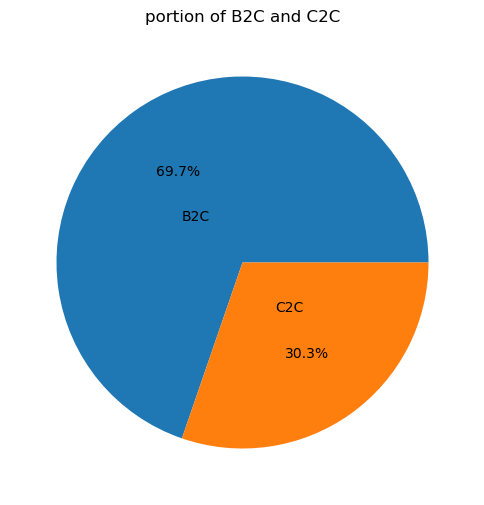

In [14]:
plt.figure(figsize=(6, 12))
plt.pie(df_ebay['b2c_c2c'].value_counts(), labels= df_ebay['b2c_c2c'].unique(), labeldistance=0.3, autopct='%1.1f%%')
plt.title('portion of B2C and C2C')

## Data Cleaning

First let do some common checking in the dataset.
 -  Null value
 -  Duplicate row

In [ ]:
#Checking null
df_ebay.isna().sum()

There is 47180 missing value in total 1 million rows. We could delete it but I decide to have deepper look at it later


In [ ]:
# checking duplicate rows
df_ebay.duplicated().any()

There are no duplicate row in the database

In [ ]:
#recall shape column
df_ebay.shape[1]

Let check out the distributions, we are going to loop over the columns and print some subplot.

In [ ]:
#checking the b2c_c2c column
df_ebay['b2c_c2c'].value_counts()

Convert `b2c_c2c` column to binary

In [ ]:
df_ebay['b2c_c2c']= np.where(df_ebay['b2c_c2c']=='B2C', 1, 0)

Test it

In [ ]:
df_ebay.head()

There is 2 `weight_units` is 1 and 2. Let say 1 - 's' and 2 - 'kg'. We are going to convert all the weight units to lb.

In [ ]:
#check the record has weigtht unit =2 to able to compare
df_ebay[df_ebay['weight_units']==2].head()

In [ ]:
df_ebay['weight'] = np.where(df_ebay['weight_units']==1, df_ebay['weight'], df_ebay['weight']*2.20462 )

check the record with `weight_units`=2 to see if the `weight` column is change

In [ ]:
df_ebay[df_ebay['weight_units']==2]

All the `weight` with the `weight_units` = 2 are convert to the **lb** unit. So now we do not need to keep the weight column since all the weight is in the **lb**. Therefore, we are going to drop the `weight column`.

In [ ]:
df_ebay.drop(columns='weight', axis=1, inplace=True)


In [ ]:
#check it
df_ebay.info()

The `weigth` column has been dropped. Next we are going to calculate the distance between the buyer and the seller buy using there zip code in the `item_zip` and `buyer_zip` columns.

In [ ]:
#check any null value in these columns.
print(df_ebay['item_zip'].isna().any())
print(df_ebay['buyer_zip'].isna().any())

In [ ]:
item_zip= df_ebay['item_zip']
buyer_zip= df_ebay['buyer_zip']

In [ ]:
# function to calculate distance between 2 zip codeusing Geocode. this function take more time to process. So We change to other package 
# country = Nominatim(user_agent="US")
# distance= []
# def distance_cal(item_zip, buyer_zip):
# # for i in range(len(buyer_zip)):
#     if buyer_zip and item_zip:
#         location1= country.geocode(item_zip)
#         location2= country.geocode(buyer_zip)
#         if location1 is None or location2 is None:
#             return None
#         lat1 = location1.latitude 
#         lon1 = location1.longitude
#         lat2 = location2.latitude
#         lon2 = location2.longitude
#         # distance between them
#         if lat1 is not None or lon1 is not None or lat2 is not None or lon2 is not None:
#             return geodesic((lat1, lon1), (lat2, lon2)).miles
#         else:
#             return None
#     else:
#         return None   
    
# def add_distance_col(item_zip, buyer_zip):
#     item = item_zip.apply(lambda x: str(x))
#     buyer = buyer_zip.apply(lambda x: str(x))

#     zips= pd.concat([item, buyer], axis=1)
#     zips['distance']= zips.apply(lambda x: distance_cal(x.item_zip, x.buyer_zip), axis=1)
#     return(zips)
# add_distance_col(item_zip, buyer_zip)

In [ ]:
import mpu
from uszipcode import SearchEngine

def get_distance(item_zip, buyer_zip):
    """
    We are going to use the package mpu and uszipcode to imporve the speed of calculating the distance between buyer and seller by using zip code. 
    These 2 packages make the speed of calculation much faster compare with using the geopy package
    """
    if item_zip is not None and buyer_zip is not None:
        search = SearchEngine()
        item_location = search.by_zipcode(item_zip[0:5])
        buyer_location =search.by_zipcode(buyer_zip[0:5])
        if item_location is None or buyer_location is None:
            return None
        else:
            lat1 =item_location.lat
            long1 =item_location.lng
            lat2 =buyer_location.lat
            long2 =buyer_location.lng
            if lat1 is None or lat2 is None or long1 is None or long2 is None:
                return None
            return mpu.haversine_distance((lat1,long1),(lat2,long2)) 
    else:
        return None


def add_zip_distance_column(item_zip, buyer_zip):
    item_zip_str = item_zip.apply(lambda x: str(x))
    buyer_zip_str = buyer_zip.apply(lambda x: str(x))

    zips = pd.concat([item_zip_str, buyer_zip_str], axis=1)

    zips['distance'] = zips.apply(lambda x: get_distance(x.item_zip, x.buyer_zip), axis=1)
    
    return zips['distance']

In [ ]:
distance = add_zip_distance_column(item_zip, buyer_zip)

Add the value of the distance in to the data frame

In [ ]:
df_ebay['distance']= distance
df_ebay.head(10)

 we also delete the `buyer_zip` and `item_zip` column since it is no more usefull when we have the distance